## Import Library

In [7]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm, tqdm_notebook

## Load Data From MongoDB

In [81]:
# Load data dari Database MongoDB 
myClient = pymongo.MongoClient("mongodb://localhost:27017")
myDatabase = myClient.iStorage
myCollection = myDatabase.backup_dataset

In [82]:
# 7 kategori artikel berita yang ada di dalam database
categories = ['news', 'bisnis', 'sports', 'entertainment', 'tekno', 'otomotif', 'health']

In [83]:
# Array yang digunakan untuk menampung data berdasarkan kategori
polhukam,bisnis,olahraga,hiburan,teknologi,otomotif,kesehatan = [],[],[],[],[],[],[]

In [84]:
# fungsi ambil data berdasarkan category
def getQuery(category=None):
    iQuery = myCollection.find(
        {"category": "{}".format(category)}, 
        {
            "category": 1, 
            "title": 1,
            "url": 1,
            "cleanContent": 1
        }).limit(15000)
    
    return iQuery

In [85]:
# fungsi input data ke list
def setData(iQuery=None):
    category = []
    for query in iQuery: category.append(query)
        
    return category

In [86]:
iData = []

In [87]:
# Ambil data dari Database dan disimpan di array berdasarkan kategori
####################################
iQuery = getQuery("news")
polhukam = setData(iQuery)
for data in tqdm(polhukam): iData.append(data)
####################################
iQuery = getQuery("bisnis")
bisnis = setData(iQuery)
for data in tqdm(bisnis): iData.append(data)
####################################
iQuery = getQuery("sports")
olahraga = setData(iQuery)
for data in tqdm(olahraga): iData.append(data)
####################################
iQuery = getQuery("entertainment")
hiburan = setData(iQuery)
for data in tqdm(hiburan): iData.append(data)
####################################
iQuery = getQuery("tekno")
teknologi = setData(iQuery)
for data in tqdm(teknologi): iData.append(data)
####################################
iQuery = getQuery("otomotif")
otomotif = setData(iQuery)
for data in tqdm(otomotif): iData.append(data)
####################################
iQuery = getQuery("health")
kesehatan = setData(iQuery)
for data in tqdm(kesehatan): iData.append(data)

100%|██████████| 15000/15000 [00:00<00:00, 719508.70it/s]


In [88]:
# Dataframe Categories
df = pd.DataFrame({
    'Nama Kategori':[
        'Polhukam','Bisnis','Olahraga','Hiburan','Teknologi','Otomotif','Kesehatan'],
    'Jumlah Data':[
        len(polhukam),
        len(bisnis),
        len(olahraga),
        len(hiburan),
        len(teknologi),
        len(otomotif),
        len(kesehatan)
    ]
})
df.loc['Total'] = pd.Series(df['Jumlah Data'].sum(), index = ['Jumlah Data'])
df

,Nama Kategori,Jumlah Data
0,Polhukam,15000.0
1,Bisnis,15000.0
2,Olahraga,15000.0
3,Hiburan,15000.0
4,Teknologi,15000.0
5,Otomotif,15000.0
6,Kesehatan,15000.0
Total,NaN,105000.0


## Konversi Data ke DataFrame (Pandas)

In [89]:
shuffle(iData)

In [90]:
df = pd.DataFrame(iData)

In [91]:
df.tail()

,_id,category,title,url,cleanContent
104995,5d6bda3edfdedb563e1c8b66,sports,10 Petinju Kelas Berat dengan Pukulan Terdahsy...,https://sport.tempo.co/read/1199189/10-petinju...,mike tyson dianggap petinju kelas berat pukula...
104996,5d6cb9d0b3ed4e4f03275498,sports,"Dipermalukan Liverpool, Bos Barcelona: Masih A...",https://bola.tempo.co/read/1203208/dipermaluka...,dikalahkan liverpool 4 0 anfield dinihari rabu...
104997,5d8db8f13b89c0d8ad117b4c,health,Berapa Kali Sehari Kita Perlu Mencuci Muka?,https://lifestyle.kompas.com/read/2018/03/28/0...,orang menganggap cuci muka sehari bersih teraw...
104998,5d6bd3c24eaa10ebad587c72,tekno,AT&T dan T Mobile Jual Samsung Galaxy Fold Mul...,https://tekno.tempo.co/read/1196147/att-dan-t-...,at t menjual samsung galaxy fold 26 april 2019...
104999,5d6e35027857a70f2f87b3d4,sports,"Hasil MotoGP Inggris: Singkirkan Marc Marquez,...",https://sport.tempo.co/read/1240110/hasil-moto...,alex rins suzuki ecstar meraih kemenangan musi...


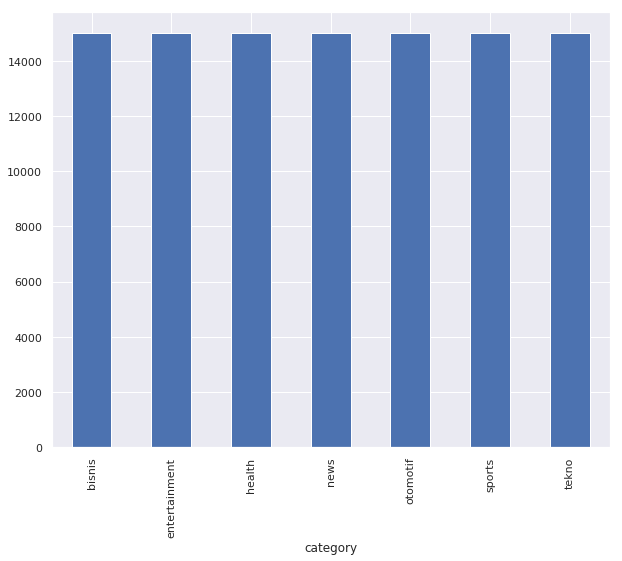

In [92]:
fig = plt.figure(figsize=(10,8))
df.groupby('category').title.count().plot.bar(ylim=0)
plt.show()

## Menggunakan Metode Naive Bayes

In [14]:
import textacy
from sklearn.naive_bayes import MultinomialNB
from textacy.preprocess import preprocess_text
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

/home/lumierra/Project-Python/.env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# mendefinisikan library ke variabel yang lebih singkat
tfidf = TfidfVectorizer(min_df=1, max_df=0.25)
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [17]:
# Membuat data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(df['cleanContent'], df['category'], random_state = 0, test_size = 0.20)

X_train_counts = count_vect.fit_transform(X_train)

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [18]:
X1 = tfidf.fit_transform(X_train)

In [19]:
X_train_tfidf.shape

(82577, 215744)

In [20]:
X1.shape

(82577, 215737)

In [21]:
# Create model MultinomialNB
modelMNB = MultinomialNB()

In [22]:
modelMNB.fit(X1, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
model = MultinomialNB().fit(X1, y_train)

In [24]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = model.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [25]:
new_title = '''Waspadalah, Stroke Kini Sudah Menyerang Orang Usia 30-an'''

In [26]:
print(get_categoryMNB(new_title))

['health']


In [27]:
# score dari model multinomial naive bayes dari 105000 dataset
print(model.score(X1, y_train))

0.9651476803468279


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [30]:
nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [31]:
y_pred = nb.predict(X_test)

In [32]:
print("Table Confusion Matrix")
print("=========================\n")
print('Accuracy %s' % accuracy_score(y_pred, y_test))
print('=========================\n')
print(classification_report(y_test, y_pred,target_names=categories))

Table Confusion Matrix

Accuracy 0.9561152821506418

               precision    recall  f1-score   support

         news       0.92      0.97      0.94      2984
       bisnis       0.95      0.97      0.96      3031
       sports       0.95      0.93      0.94      2936
entertainment       0.93      0.97      0.95      2963
        tekno       0.98      0.97      0.97      3013
     otomotif       0.99      0.97      0.98      3079
       health       0.98      0.92      0.95      2639

  avg / total       0.96      0.96      0.96     20645



In [33]:
import textacy
from sklearn.naive_bayes import MultinomialNB
from textacy.preprocess import preprocess_text
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
tfidf = TfidfVectorizer(min_df=1, max_df=0.25)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df['cleanContent'], df['category'])

In [95]:
X1 = tfidf.fit_transform(X_train)

In [96]:
X1.shape

(78750, 212510)

In [97]:
print('X_traint : {}'.format(len(X_train)))
print('X_test   : {}'.format(len(X_test)))
print('Total    : {}'.format(len(X_train) + len(X_test)))

X_traint : 78750
X_test   : 26250
Total    : 105000


In [98]:
clf = MultinomialNB().fit(X1, y_train)

In [99]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = clf.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [117]:
new_title = '''Arifin Ilham Sakit, Ini 7 Tips Bantuan Saat Kerabat Sakit'''

In [3]:
print(get_categoryMNB(new_title))

NameError: name 'get_categoryMNB' is not defined

In [102]:
print(clf.score(X1, y_train))

0.9661587301587301


In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()

In [104]:
model = make_pipeline(TfidfVectorizer(min_df=1, max_df=0.25), MultinomialNB())

In [105]:
model.fit(X_train, y_train)
labels = model.predict(X_test)

In [106]:
print("Table Confusion Matrix")
print("=========================\n")
print('Accuracy %s' % accuracy_score(labels, y_test))
print('=========================\n')
print(classification_report(y_test, labels,target_names=categories))

Table Confusion Matrix

Accuracy 0.9607238095238095

               precision    recall  f1-score   support

         news       0.92      0.97      0.94      3816
       bisnis       0.96      0.98      0.97      3673
       sports       0.97      0.93      0.95      3728
entertainment       0.94      0.97      0.95      3720
        tekno       0.98      0.97      0.97      3780
     otomotif       0.99      0.97      0.98      3731
       health       0.98      0.94      0.96      3802

  avg / total       0.96      0.96      0.96     26250



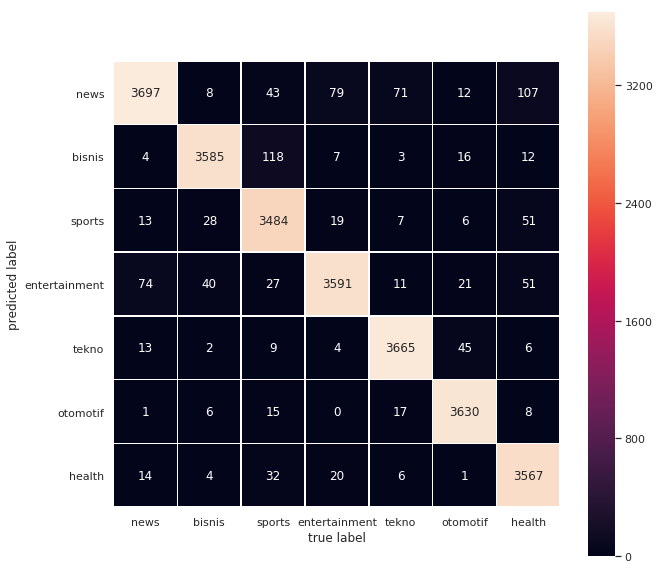

In [107]:
mat = confusion_matrix(y_test, labels)
f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,linewidths=.6, ax=ax,
            xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Check Data

In [49]:
# Load data dari Database MongoDB 
client = pymongo.MongoClient("mongodb://localhost:27017")
database = client.iStorage
collection = database.temp

In [77]:
def insertData(attr=None):
    client = pymongo.MongoClient("mongodb://localhost:27017")
    database = client.iStorage
    collection = database.backup_dataset
    collection.insert_one(attr)
    
#     try:
#         collection.insert(attr)
#         print('Insert Data into MongoDB Successfully')
#     except:
#         print('Insert Data into Mongod Failed')

In [4]:
def getData(category=None):
    client = pymongo.MongoClient("mongodb://localhost:27017")
    database = client.iStorage
    collection = database.backup_dataset
    
    iData = []
    iQuery = collection.find(
        {"category": "{}".format(category)}, 
        {
            "category": 1, 
            "title": 1,
            "url": 1,
            "cleanContent": 1
        })
    
    for query in iQuery: iData.append(query)
        
    return iData

In [70]:
def deleteData(col=None):
    client = pymongo.MongoClient("mongodb://localhost:27017")
    database = client.iStorage
    collection = database["{}".format(col)]
    
    query = collection.remove({})

In [72]:
# Hapus Data di Collection
# deleteData('dataset')

In [78]:
def makeDataset2(category=None):
    data = getData('{}'.format(category))
    benar = 0
    salah = 0
    for d in tqdm(data):
        if d['category'] == get_categoryMNB(d['title']):
            benar+=1
            insertData(d)
        else: salah+=1

    print('=============================')
    print('Benar : {}'.format(benar))
    print('Salah : {}'.format(salah))

In [79]:
makeDataset2('tekno')

100%|██████████| 3125/3125 [00:20<00:00, 156.25it/s]

Benar : 2436
Salah : 689


In [8]:
def makeDataset(category=None):
    data = getData('{}'.format(category))
    benar = 0
    salah = 0
    for i in tqdm(range(len(data))[:100]):
        print(data[i]['title'])
        print('Kategori : ' + data[i]['category'])
        print(get_categoryMNB(data[i]['title']))
        if data[i]['category'] == get_categoryMNB(data[i]['cleanContent']): 
            benar+=1
            print('Benar')
#             insertData(data[i])
        else: 
            salah+=1
            print('Salah')
        print('======================================\n')

    print('=============================')
    print('Benar : {}'.format(benar))
    print('Salah : {}'.format(salah))

In [9]:
makeDataset('tekno')

  0%|          | 0/100 [00:00<?, ?it/s]

Tsunami Selat Sunda di Pantai Carita Banten Hingga 5,26 Meter
Kategori : tekno


NameError: name 'get_categoryMNB' is not defined

## Save Model Naive Bayes MultinomialNB

In [37]:
import pickle

In [50]:
pkl_filename = 'modelMNB.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(modelMNB, file)

In [51]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [54]:
# Calculate the accuracy score and predict target values
score = pickle_model.score(X1, y_train)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X1)

Test score: 91.58 %


In [55]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = pickle_model.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [56]:
title = '''Waspadalah, Stroke Kini Sudah Menyerang Orang Usia 30-an'''

In [59]:
print(get_categoryMNB(title)[0])

health


## Joblib

In [10]:
from sklearn.externals import joblib

In [126]:
joblib.dump(modelMNB, 'model_joblib')

['model_joblib']

In [127]:
mj = joblib.load('model_joblib')

In [128]:
mj.score(X1, y_train)

0.8939410971223022

In [129]:
mj.predict(tfidf.transform([new_title]))

array(['entertainment'], dtype='<U13')

## Testing

In [108]:
import requests
from bs4 import BeautifulSoup

In [109]:
url = '''https://newsapi.org/v2/top-headlines?country=id&apiKey=3bb4bf323f7f43d3aaafb6bd5cd26c92'''

In [110]:
response = requests.get(url).json()

In [111]:
response

{'status': 'ok',
 'totalResults': 38,
 'articles': [{'source': {'id': None, 'name': 'Liputan6.com'},
   'author': 'Andina Librianty',
   'title': 'Motorola Yakin Smartphone Razr Terbaru Tak Bermasalah Seperti Galaxy Fold - Liputan6.com',
   'description': 'Motorola Razr dipastikan tidak akan mengalami masalah fleksibilitas layar, seperti yang sebelumnya dialami Galaxy Fold.',
   'url': 'https://www.liputan6.com/tekno/read/4112318/motorola-yakin-smartphone-razr-terbaru-tak-bermasalah-seperti-galaxy-fold',
   'urlToImage': 'https://cdn0-production-images-kly.akamaized.net/xjHSFeb4FUaLAb56bREfq2k5FZk=/673x379/smart/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/2967342/original/090732800_1573716052-Moto_Razr.jpg',
   'publishedAt': '2019-11-17T09:00:08Z',
   'content': 'Liputan6.com, Jakarta -Motorola telah mengumumkan smartphone lipat dengan desain mirip Razr V3. Perusahaan pun memastikan smartphone tersebut tidak akan mengalami masalah fleksibilitas layar, sepe

In [112]:
temp = []
for r in response['articles']:
    print(r['source'])
    temp.append(r)

{'id': None, 'name': 'Liputan6.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Kumparan.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Tribunnews.com'}
{'id': None, 'name': 'Cnnindonesia.com'}
{'id': None, 'name': 'Grid.id'}
{'id': None, 'name': 'Selular.id'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Sindonews.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Cnnindonesia.com'}
{'id': None, 'name': 'Tribunnews.com'}
{'id': None, 'name': 'Cnbcindonesia.com'}
{'id': None, 'name': 'Kontan.co.id'}


In [113]:
temp

[{'source': {'id': None, 'name': 'Liputan6.com'},
  'author': 'Andina Librianty',
  'title': 'Motorola Yakin Smartphone Razr Terbaru Tak Bermasalah Seperti Galaxy Fold - Liputan6.com',
  'description': 'Motorola Razr dipastikan tidak akan mengalami masalah fleksibilitas layar, seperti yang sebelumnya dialami Galaxy Fold.',
  'url': 'https://www.liputan6.com/tekno/read/4112318/motorola-yakin-smartphone-razr-terbaru-tak-bermasalah-seperti-galaxy-fold',
  'urlToImage': 'https://cdn0-production-images-kly.akamaized.net/xjHSFeb4FUaLAb56bREfq2k5FZk=/673x379/smart/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/2967342/original/090732800_1573716052-Moto_Razr.jpg',
  'publishedAt': '2019-11-17T09:00:08Z',
  'content': 'Liputan6.com, Jakarta -Motorola telah mengumumkan smartphone lipat dengan desain mirip Razr V3. Perusahaan pun memastikan smartphone tersebut tidak akan mengalami masalah fleksibilitas layar, seperti yang sebelumnya dialami Galaxy Fold.\r\nDikutip dari P

In [114]:
for t in temp:
    print(t['title'])
    print(t['url'])
    print('=========================\n')
    print(get_categoryMNB(t['title']))
    print('=========================\n')

Motorola Yakin Smartphone Razr Terbaru Tak Bermasalah Seperti Galaxy Fold - Liputan6.com
https://www.liputan6.com/tekno/read/4112318/motorola-yakin-smartphone-razr-terbaru-tak-bermasalah-seperti-galaxy-fold

['tekno']

4 Pemain Dicoret dari Timnas U-23, Salah Satunya Beto - detikSport
https://sport.detik.com/sepakbola/liga-indonesia/d-4787957/4-pemain-dicoret-dari-timnas-u-23-salah-satunya-beto

['sports']

Dewi Tanjung Resmi Dipolisikan soal Laporan Palsu Rekayasa Kasus Novel - kumparan.com - kumparan.com
https://kumparan.com/kumparannews/dewi-tanjung-resmi-dipolisikan-soal-laporan-palsu-rekayasa-kasus-novel-1sGpwAFZ5zq

['news']

Hong Kong Open 2019, Ahsan/Hendra Hanya Jadi Runner Up - KOMPAS.com
https://bola.kompas.com/read/2019/11/17/15262178/hong-kong-open-2019-ahsan-hendra-hanya-jadi-runner-up?page=all

['sports']

MotoGP Valencia 2019: Bantah Gabung Ducati, Johann Zarco Berambisi ke Repsol Honda - Tribunnews
https://www.tribunnews.com/sport/2019/11/17/motogp-valencia-2019-bantah

## Testing

In [80]:
client = pymongo.MongoClient("mongodb://localhost:27017")
database = myClient.iStorage
collection = myDatabase.iBefore

In [81]:
iQuery = collection.find({})

In [82]:
data = []
for q in iQuery: data.append(q)

In [87]:
for d in data:
    print(d['title'])
    print(d['url'])
    print('=========================\n')
    print(get_categoryMNB(d['title']))
    print('=========================\n')

Bank Mandiri Catat Laba Rp 20,3 T, Tumbuh 11,9 Persen
https://bisnis.tempo.co/read/1265518/bank-mandiri-catat-laba-rp-203-t-tumbuh-119-persen

['bisnis']

Senja di Kaimana, Masih Seelok Dahulu
https://travel.tempo.co/read/1265515/senja-di-kaimana-masih-seelok-dahulu

['entertainment']

Uni Eropa Setuju Penundaan Brexit, Apa Syaratnya?
https://dunia.tempo.co/read/1265473/uni-eropa-setuju-penundaan-brexit-apa-syaratnya

['bisnis']

Menpan RB Tjahjo Kumolo: Pendaftaran CPNS 2019 Dibuka 11 November
https://bisnis.tempo.co/read/1265493/menpan-rb-tjahjo-kumolo-pendaftaran-cpns-2019-dibuka-11-november

['bisnis']

Waspadalah, Stroke Kini Sudah Menyerang Orang Usia 30-an
https://gaya.tempo.co/read/1265506/waspadalah-stroke-kini-sudah-menyerang-orang-usia-30-an

['health']

Bali Macet, Jerinx SID Salahkan Pemerintah
https://seleb.tempo.co/read/1265507/bali-macet-jerinx-sid-salahkan-pemerintah

['entertainment']

